In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

g, R = 9.8, 6.4e6
y0, v0 = 150000, 300

graph_y_lower_limit = 0
graph_y_upper_limit = int(1.1*y0) if v0<=0 else int(1.1*(y0 + v0**2/(2*g)))
graph_v_lower_limit = -1*(v0**2+2*g*y0)**0.5
graph_v_upper_limit = v0 
graph_kin_en_lower_limit = int(1.1*v0**2/2) if v0<=0 else 0
graph_kin_en_upper_limit = int(1.1*(v0**2/2+g*y0))
graph_pot_en_lower_limit = 0
graph_pot_en_upper_limit = int(1.1*(v0**2/2 + g*y0)) if v0>=0 else int(1.1*g*y0)
graph_full_en_lower_limit = 0
graph_full_en_upper_limit = int(1.1*(v0**2/2 + g*y0))

In [13]:
def Runge_Kutta_4method(y0, v0, t0 = 0, h = 0.1, h_pr = 1):
    T, Y, V = [t0], [y0], [v0]
    dt, dy, dv = 0, 0, 0
    k, c =  [{'dy':0, 'dv':0}]*5, [0, h/2, h/2, h]
    while (True):
        for j in range(4):
            k[j+1]['dy'] = V[-1]+c[j]*k[j]['dv']
            k[j+1]['dv'] = -g/(1+(Y[-1]+c[j]*k[j]['dy'])/R)**2
        dt += h
        dt = round(dt, h_pr)
        dy = h*(k[1]['dy']+2*k[2]['dy']+2*k[3]['dy']+k[4]['dy'])/6
        dv = h*(k[1]['dv']+2*k[2]['dv']+2*k[3]['dv']+k[4]['dv'])/6
        if Y[-1] + dy >= 0:
            T.append(t0 + dt)
            Y.append(Y[-1] + dy)
            V.append(V[-1] + dv)
        else:
            break
    n = len(T)
    return (n, T, Y, V)

<IPython.core.display.Javascript object>


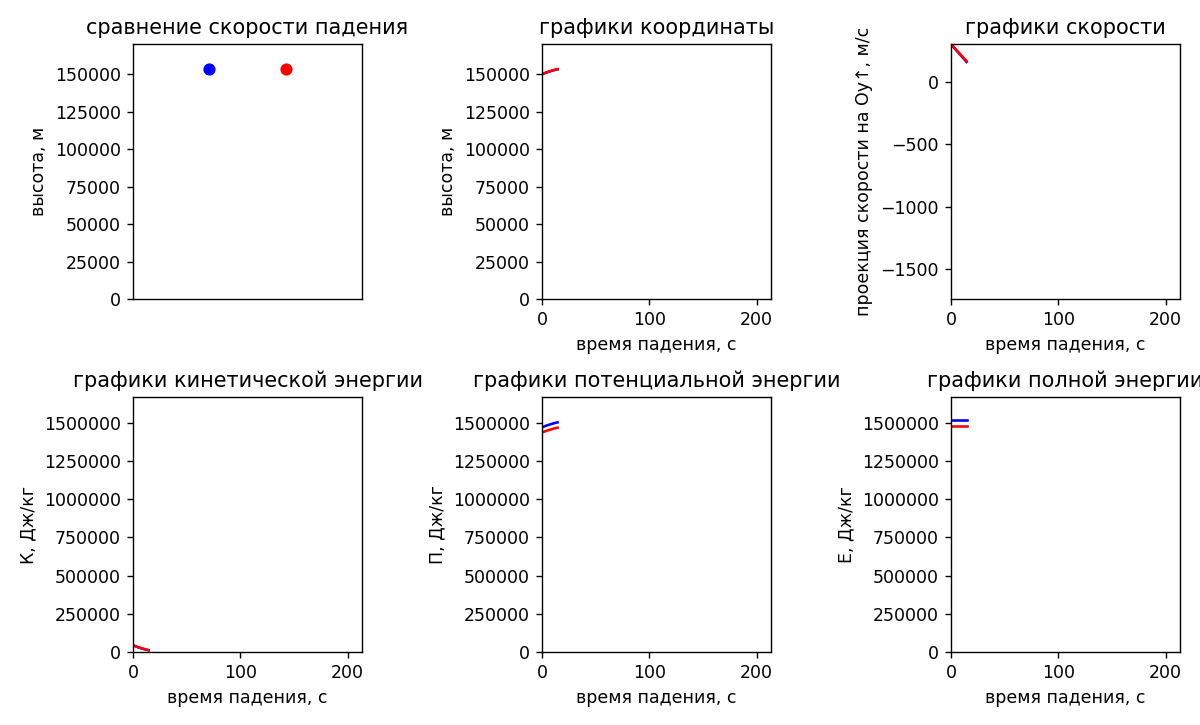

In [15]:
#случай без упругого удара
#графики красного синего цвета - для g = const, красного - для g = GM/(y+R)^2
solution = Runge_Kutta_4method(y0=y0, v0=v0)
n, T, Y2, V2 = solution[0], solution[1], solution[2], solution[3]

gap = 0.0001
if Y2[-1] > gap:
    h, h_pr = 0.01, 2
    solution = Runge_Kutta_4method(t0=T[-1], y0=Y2[-1], v0=V2[-1], h=h, h_pr=h_pr)
    n_, T_, Y2_, V2_ = solution[0], solution[1], solution[2], solution[3]
    while Y2_[-1] > gap:
        h_pr += 1
        h = round(h/10, h_pr)
        solution = Runge_Kutta_4method(t0=T_[-1], y0=Y2_[-1], v0=V2_[-1], h=h, h_pr=h_pr)
        n_, T_, Y2_, V2_ = solution[0], solution[1], solution[2], solution[3]
    T.append(T_[-1])
    Y2.append(Y2_[-1])
    V2.append(V2_[-1])
    n += 1

t = T[-1]
Y1 = list(map(lambda t : y0+v0*t-g*(t**2)/2, T))
V1 = list(map(lambda t: v0-g*t, T))
K1 = list(map(lambda v: v**2/2, V1))
K2 = list(map(lambda v: v**2/2, V2))
P1 = list(map(lambda y: g*y if  y>=0 else 0, Y1))
P2 = list(map(lambda y: g*y*R/(y+R), Y2))
E1 = [K1[i] + P1[i] for i in range(n)]
E2 = [K2[i] + P2[i] for i in range(n)]

fig = plt.figure(num = 'Свободное падение с учётом зависимости g от высоты и без', figsize=(9.6, 5.8))
ax = fig.subplots(2, 3)
ax1, ax2, ax3, ax4, ax5, ax6 = ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1], ax[1][2]
ax1.axis([0, 3, graph_y_lower_limit, graph_y_upper_limit])
ax1.set_title('сравнение скорости падения')
ax1.xaxis.set_ticks_position('none')
ax1.set_xticklabels([])
ax1.set_ylabel('высота, м')
ax2.axis([0, t, graph_y_lower_limit, graph_y_upper_limit])
ax2.set_title('графики координаты')
ax2.set_xlabel('время падения, с')
ax2.set_ylabel('высота, м')
ax3.axis([0, t, graph_v_lower_limit, graph_v_upper_limit])
ax3.set_title('графики скорости')
ax3.set_xlabel('время падения, с')
ax3.set_ylabel('проекция скорости на Oy↑, м/с')
ax4.axis([0, t, graph_kin_en_lower_limit , graph_kin_en_upper_limit])
ax4.set_title('графики кинетической энергии')
ax4.set_xlabel('время падения, с')
ax4.set_ylabel('К, Дж/кг')
ax5.axis([0, t, graph_pot_en_lower_limit, graph_pot_en_upper_limit])
ax5.set_title('графики потенциальной энергии')
ax5.set_xlabel('время падения, с')
ax5.set_ylabel('П, Дж/кг')
ax6.axis([0, t, graph_full_en_lower_limit, graph_full_en_upper_limit])
ax6.set_title('графики полной энергии')
ax6.set_xlabel('время падения, с')
ax6.set_ylabel('E, Дж/кг')

fall1_dot, = ax1.plot([1], [None], 'bo')
fall2_dot, = ax1.plot([2], [None], 'ro')
y1_line,  = ax2.plot([],[], color ='b')
y2_line,  = ax2.plot([],[], color ='r')
v1_line, = ax3.plot([], [], color ='b')
v2_line, = ax3.plot([], [], color ='r')
y1_dot, = ax2.plot([], [], 'bo')
y2_dot, = ax2.plot([], [], 'ro')
v1_dot, = ax3.plot([], [], 'bo')
v2_dot, = ax3.plot([], [], 'ro')
k1_line, = ax4.plot([],[], color ='b')
k2_line, = ax4.plot([],[], color ='r')
p1_line, = ax5.plot([], [], color ='b')
p2_line, = ax5.plot([], [], color ='r')
e1_line, = ax6.plot([],[], color ='b')
e2_line, = ax6.plot([],[], color ='r')
k1_dot, = ax4.plot([], [], 'bo')
k2_dot, = ax4.plot([], [], 'ro')
p1_dot, = ax5.plot([], [], 'bo')
p2_dot, = ax5.plot([], [], 'ro')
e1_dot, = ax6.plot([], [], 'bo')
e2_dot, = ax6.plot([], [], 'ro')
fig.tight_layout()


def animate(i):  
    fall1_dot.set_ydata(Y1[i]) 
    fall2_dot.set_ydata(Y2[i]) 
    y1_line.set_data(T[:i], Y1[:i])
    y2_line.set_data(T[:i], Y2[:i])   
    v1_line.set_data(T[:i], V1[:i])
    v2_line.set_data(T[:i], V2[:i])  
    k1_line.set_data(T[:i], K1[:i])
    k2_line.set_data(T[:i], K2[:i])
    p1_line.set_data(T[:i], P1[:i])
    p2_line.set_data(T[:i], P2[:i])
    e1_line.set_data(T[:i], E1[:i])
    e2_line.set_data(T[:i], E2[:i])

    return (fall1_dot, fall2_dot, y1_line, y2_line, v1_line, v2_line, k1_line, k2_line, p1_line, p2_line, e1_line, e2_line)


myAnimation = animation.FuncAnimation(fig, animate, frames=range(n), interval=1, blit=True, repeat=True)
plt.show()

[(0, 150000.0, 300.0), (0.1, 150029.951, 299.02), (0.2, 150059.804, 298.04), (0.3, 150089.559, 297.06), (0.4, 150119.216, 296.08), (0.5, 150148.775, 295.1), (0.6, 150178.236, 294.12), (0.7, 150207.599, 293.14), (0.8, 150236.864, 292.16), (0.9, 150266.031, 291.18), (1.0, 150295.1, 290.2), (1.1, 150324.071, 289.22), (1.2, 150352.944, 288.24), (1.3, 150381.719, 287.26), (1.4, 150410.396, 286.28), (1.5, 150438.975, 285.3), (1.6, 150467.456, 284.32), (1.7, 150495.839, 283.34), (1.8, 150524.124, 282.36), (1.9, 150552.311, 281.38), (2.0, 150580.4, 280.4), (2.1, 150608.391, 279.42), (2.2, 150636.284, 278.44), (2.3, 150664.079, 277.46), (2.4, 150691.776, 276.48), (2.5, 150719.375, 275.5), (2.6, 150746.876, 274.52), (2.7, 150774.279, 273.54), (2.8, 150801.584, 272.56), (2.9, 150828.791, 271.58), (3.0, 150855.9, 270.6), (3.1, 150882.911, 269.62), (3.2, 150909.824, 268.64), (3.3, 150936.639, 267.65999999999997), (3.4, 150963.356, 266.68), (3.5, 150989.975, 265.7), (3.6, 151016.496, 264.72), (3.7, 

<IPython.core.display.Javascript object>


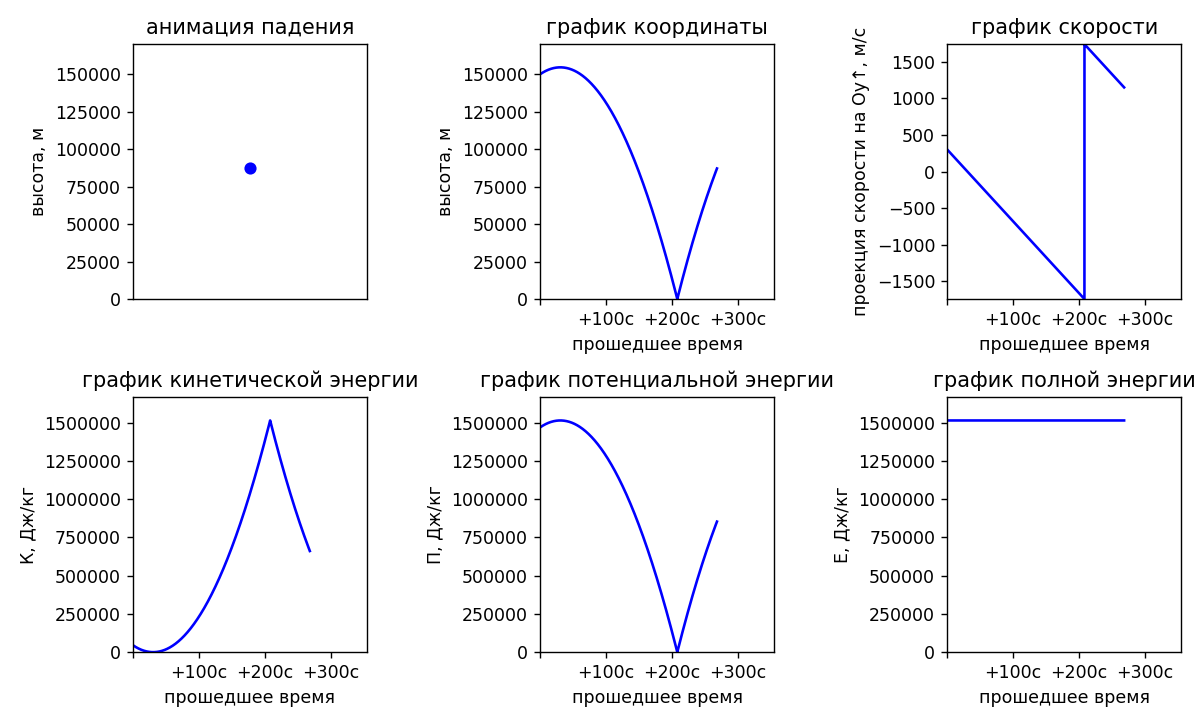

In [23]:
# одномерное пвдение с отражение для g = const
def TrajectoryBuilder1(dt, y0, v0): #дает значения координат и скорости по времени для случая с отражение, когда g = const
    t_fall = (v0+(v0**2+2*g*y0)**0.5)/g
    y_peak = y0 + v0**2/(2*g)
    v_ref = (v0**2 + 2*g*y0)**0.5
    t_peak = None
    if v0>=0:
        t_peak = v0/g     
        t_cycle = 2*(t_fall - t_peak)
        #print(f't_peak = {t_peak}, t_fall = {t_fall}, t_cycle = {t_cycle}')
    else:
        t_peak = 2*t_fall - v0/g
        t_cycle = t_peak - v0/g
        #print(f't_fall = {t_fall}, t_peak = {t_peak}, t_cycle = {t_cycle}')
    T1, T2 = [], []

    t = 0
    if_add_point = False
    while t <= t_fall:
        T1.append(t)
        t += dt
        t = round(t, 1)
    if T1[-1] != t_fall:
        T1.append(t_fall)
        if_add_point = True
    while t <= t_cycle:
        T2.append(t)
        t += dt
        t = round(t, 1)
    if T2[-1] != t_cycle:
        T2.append(t_cycle)
    Y1 = list(map(lambda t: y0 + v0*t - g*t**2/2, T1)) 
    Y2 = list(map(lambda t: v_ref*(t-t_fall)-g*(t-t_fall)**2/2, T2))
    V1 = list(map(lambda t: v0 - g*t, T1))
    V2 = list(map(lambda t: v_ref - g*(t-t_fall), T2)) 
    T = T1 + T2
    Y = Y1 + Y2
    V = V1 + V2
    
    t_peak_index = int(t_peak // dt) if v0 >= 0 else int(t_peak // dt) + if_add_point
    if T[t_peak_index] != t_peak:
        T.insert(t_peak_index + 1 , t_peak)
        Y.insert(t_peak_index + 1 , y_peak)
        V.insert(t_peak_index + 1 , 0)
    
    n = len(T) 
    #print(f'n = {n}')
    return(n, T, Y, V)

dt = 0.1
solution = TrajectoryBuilder1(dt, y0, v0)
n, T, Y, V = solution[0], solution[1], solution[2], solution[3]
#print(list(zip(T, Y, V)))
t = T[-1]
K = list(map(lambda v: v**2/2, V))
P = list(map(lambda y: g*y, Y))
E = [K[i] + P[i] for i in range(n)]

fig = plt.figure(num = 'свободное падение с отскоком, g = const', figsize=(9.6, 5.8))
ax = fig.subplots(2, 3)
ax1, ax2, ax3, ax4, ax5, ax6 = ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1], ax[1][2]
ax1.axis([0, 2, graph_y_lower_limit, graph_y_upper_limit])
ax1.set_title('анимация падения')
ax1.xaxis.set_ticks_position('none')
ax1.set_xticklabels([])
ax1.set_ylabel('высота, м')
ax2.axis([0, t, graph_y_lower_limit, graph_y_upper_limit])
ax2.set_title('график координаты')
ax2.set_xlabel('прошедшее время')
ax2.set_xticklabels(['', '+100c', '+200c', '+300c'])
ax2.set_ylabel('высота, м')
ax3.axis([0, t, graph_v_lower_limit, -graph_v_lower_limit])
ax3.set_title('график скорости')
ax3.set_xlabel('прошедшее время')
ax3.set_xticklabels(['', '+100c', '+200c', '+300c'])
ax3.set_ylabel('проекция скорости на Oy↑, м/с')
ax4.axis([0, t, graph_kin_en_lower_limit , graph_kin_en_upper_limit])
ax4.set_title('график кинетической энергии')
ax4.set_xlabel('прошедшее время')
ax4.set_xticklabels(['', '+100c', '+200c', '+300c'])
ax4.set_ylabel('К, Дж/кг')
ax5.axis([0, t, graph_pot_en_lower_limit, graph_pot_en_upper_limit])
ax5.set_title('график потенциальной энергии')
ax5.set_xlabel('прошедшее время')
ax5.set_xticklabels(['', '+100c', '+200c', '+300c'])
ax5.set_ylabel('П, Дж/кг')
ax6.axis([0, t, graph_full_en_lower_limit, graph_full_en_upper_limit])
ax6.set_title('график полной энергии')
ax6.set_xlabel('прошедшее время')
ax6.set_xticklabels(['', '+100c', '+200c', '+300c'])
ax6.set_ylabel('E, Дж/кг')
fig.tight_layout()

fall_dot, = ax1.plot([1], [None], 'bo')
y_line,  = ax2.plot([],[], color ='b')
v_line,  = ax3.plot([],[], color ='b')
k_line, = ax4.plot([],[], color ='b')
p_line, = ax5.plot([],[], color ='b')
e_line, = ax6.plot([],[], color ='b')

def animate(i):  
    fall_dot.set_ydata(Y[i]) 
    y_line.set_data(T[:i], Y[:i])
    v_line.set_data(T[:i], V[:i])
    k_line.set_data(T[:i], K[:i])
    p_line.set_data(T[:i], P[:i])
    e_line.set_data(T[:i], E[:i])
      
    return (fall_dot, y_line, v_line, k_line, p_line, e_line)


myAnimation = animation.FuncAnimation(fig, animate, frames=range(n), interval=1, blit=True, repeat=True)
plt.show()